In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy.constants import *

In [2]:
def rk4(f, y0, t0, dt, tf, **kwargs):
    t_list = list()
    y_list = list()
    t_list.append(t0)
    y_list.append(y0)
    yn = y0;
    tn = t0;
    while (tn  < tf):
        k1 = f(yn, tn, **kwargs)
        k2 = f(yn + dt*k1/2, tn + dt / 2, **kwargs)
        k3 = f(yn + dt * k2/2, tn + dt / 2, **kwargs)
        k4 = f(yn + dt * k3, tn + dt, **kwargs)
        tn += dt
        yn = yn + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        t_list.append(tn)
        y_list.append(yn)
        if (tn+dt > tf):
            dt = tf - tn
    return t_list, y_list

In [3]:
def appendConj(fhat_nn):
    return np.append(fhat_nn, np.flip(np.conjugate(fhat_nn[1:])))

def ifft_nn(fhat_nn):
    return fft.ifft(appendConj(fhat_nn))

In [4]:
def DerivP(fhat_nn, p):
    ks = np.arange(len(fhat_nn))
    return np.power(1j, p) * np.power(ks, p) * fhat_nn

### $$\partial_t u = v u_{xx} + u^pu_x$$

In [5]:
def InitCondition(N, m=1, func=np.sin):
    x = np.array([2 * pi * i / N for i in range(N)])
    fhat = fft.fft(func(m*x))
    n_of_nonneg_wave_numbers = 1+int(np.floor(N/2))
    return fhat[0:n_of_nonneg_wave_numbers]

In [6]:
def RHS(fhat_nn, t, v=0, p=1):
    dfhat_nn = DerivP(fhat_nn, 1)
    ddfhat_nn = DerivP(fhat_nn, 2)

    f = ifft_nn(fhat_nn)
    fp = np.power(f, p)
    
    df = ifft_nn(dfhat_nn)
    second = fft.fft(fp * df)
    second_nn = second[0:len(fhat_nn)]  
    return v * ddfhat_nn + second_nn

In [7]:
def solve(init_nn, v=1, p=1, tf=1):
    ts, fhats= rk4(RHS, y0 = init_nn, t0 = 0, dt = 1e-3, tf = tf, v=v, p=p)
    return ts, fhats

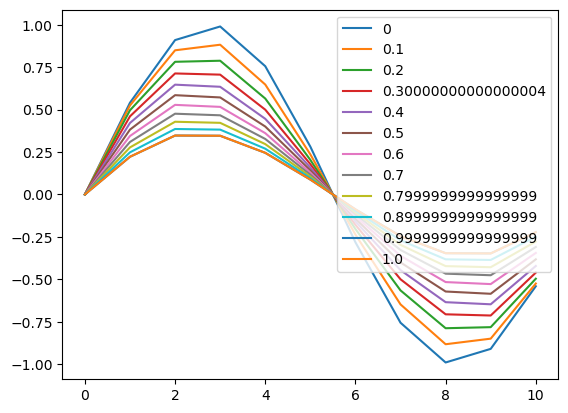

In [8]:
N = 11
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt = 1e-1, tf = 1, v=1, p=1)
for t, fhat in zip(ts, fhats_nn):
    plt.plot(ifft_nn(fhat).real, label=str(t))
plt.legend()

### (a)

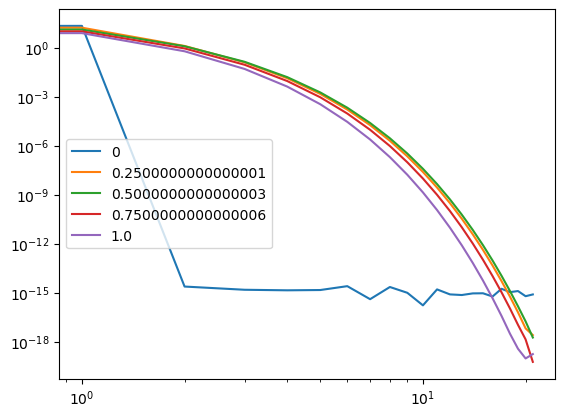

In [9]:
N = 43
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt = 5e-3, tf = 1, v=1, p=1)
freqs = fft.fftfreq(N, 1/N)[0:len(fhats_nn[0])]
c = 0
for t, fhat in zip(ts, fhats_nn):
    c = (c+1) % 50
    if (c == 1):
        plt.loglog(freqs, np.abs(fhat), label=str(t))
plt.legend()

### We see that $N=43$ works for $t_f = 0.5$.

## (b)

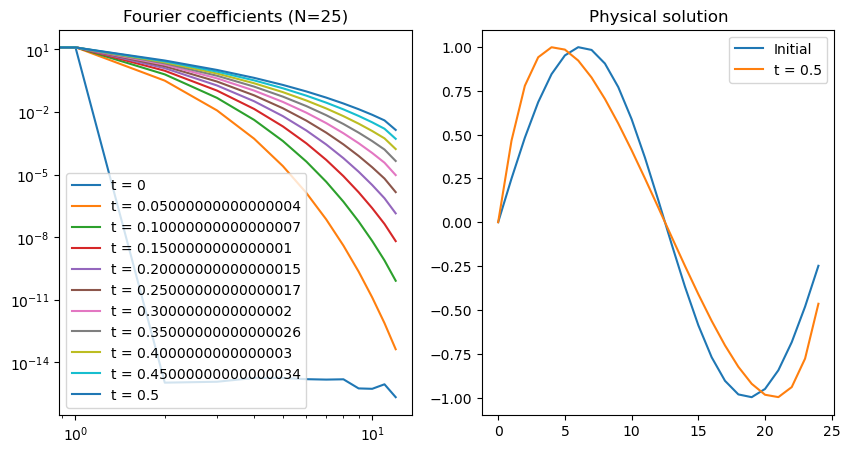

In [10]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
N = 25
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt=1e-3, v=1e-4, p=1, tf=0.5)
freqs = fft.fftfreq(N, 1/N)[0:len(fhats_nn[0])]
c = 0
for t, fhat in zip(ts, fhats_nn):
    c = (c+1) % 50
    if (c == 1):
        axs[0].loglog(freqs, np.abs(fhat), label=f't = {str(t)}')
axs[0].legend()
axs[0].set_title(f"Fourier coefficients (N={N})")
axs[1].plot(ifft_nn(fhats_nn[0]), label='Initial')
axs[1].plot(ifft_nn(fhats_nn[-1]), label=f't = {ts[-1]}')
axs[1].legend()
axs[1].set_title("Physical solution")
plt.show()

## This is an example of a poorly-resolved solution, despite the physical solution looking 'OK'.

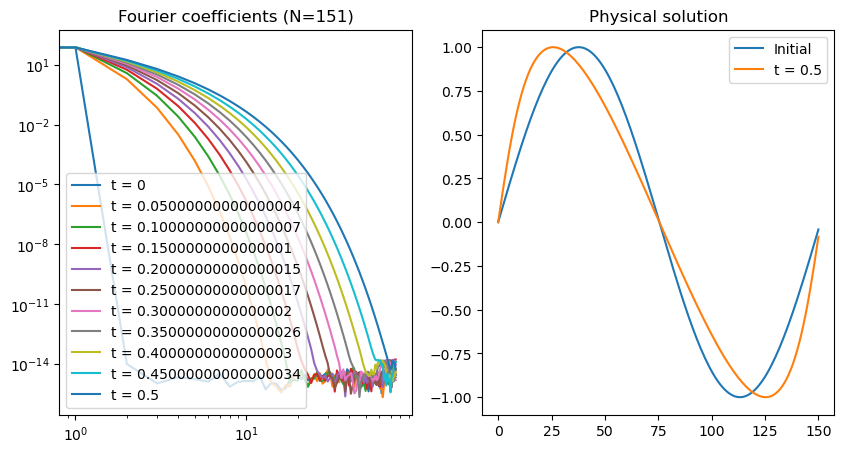

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
N = 151
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt=1e-3, v=1e-4, p=1, tf=0.5)
freqs = fft.fftfreq(N, 1/N)[0:len(fhats_nn[0])]
c = 0
for t, fhat in zip(ts, fhats_nn):
    c = (c+1) % 50
    if (c == 1):
        axs[0].loglog(freqs, np.abs(fhat), label=f't = {str(t)}')
axs[0].legend()
axs[0].set_title(f"Fourier coefficients (N={N})")

axs[1].plot(ifft_nn(fhats_nn[0]), label='Initial')
axs[1].plot(ifft_nn(fhats_nn[-1]), label=f't = {ts[-1]}')
axs[1].legend()
axs[1].set_title("Physical solution")
plt.show()

## Finally for $N=151$ we see that the solution is just beginning to be well-resolved.

## (c)

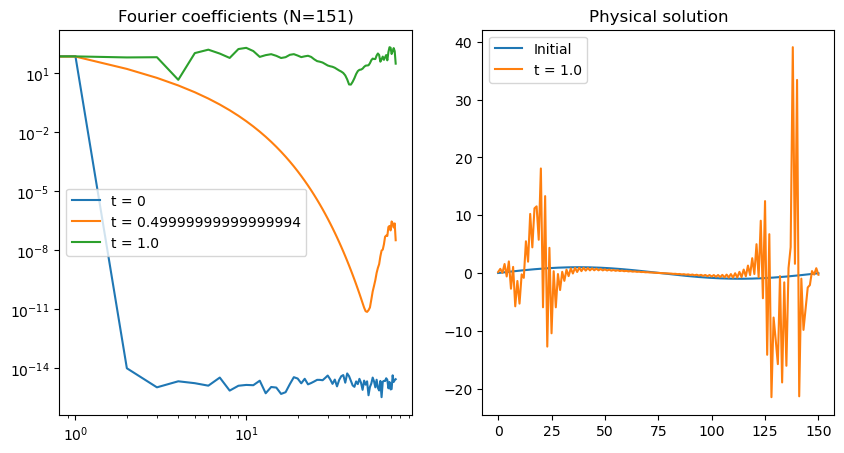

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
N = 151
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt=5e-2, v=1e-2, p=1, tf=1)
freqs = fft.fftfreq(N, 1/N)[0:len(fhats_nn[0])]
c = 0
for t, fhat in zip(ts, fhats_nn):
    c = (c+1) % 10
    if (c == 1 or t == ts[-1]):
        axs[0].loglog(freqs, np.abs(fhat), label=f't = {str(t)}')
axs[0].legend()
axs[0].set_title(f"Fourier coefficients (N={N})")

axs[1].plot(ifft_nn(fhats_nn[0]), label='Initial')
axs[1].plot(ifft_nn(fhats_nn[-1]), label=f't = {ts[-1]}')
axs[1].legend()
axs[1].set_title("Physical solution")
plt.show()

## Solution blows up at $t\le 1$ when $dt = 0.05$, but not when $dt=0.04$.

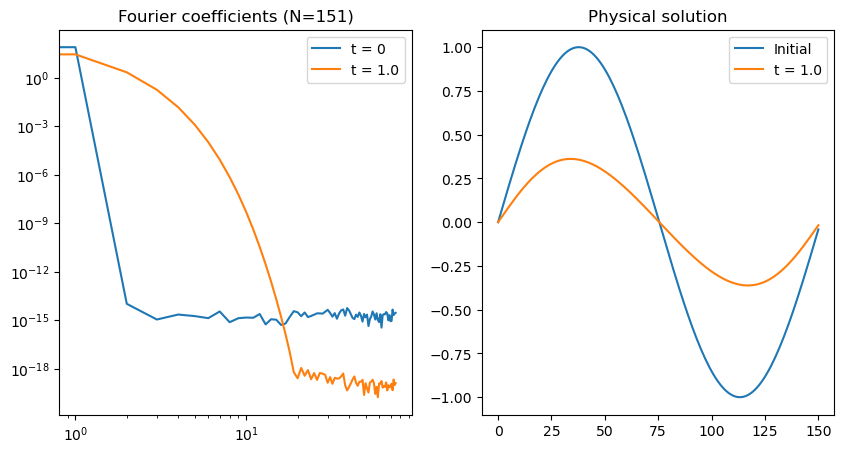

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
N = 151
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt=4e-4, v=1, p=1, tf=1)
freqs = fft.fftfreq(N, 1/N)[0:len(fhats_nn[0])]
c = 0
for t, fhat in zip(ts, fhats_nn):
    c = (c+1) % 3000
    if (c == 1 or t == ts[-1]):
        axs[0].loglog(freqs, np.abs(fhat), label=f't = {str(t)}')
axs[0].legend()
axs[0].set_title(f"Fourier coefficients (N={N})")

axs[1].plot(ifft_nn(fhats_nn[0]), label='Initial')
axs[1].plot(ifft_nn(fhats_nn[-1]), label=f't = {ts[-1]}')
axs[1].legend()
axs[1].set_title("Physical solution")
plt.show()

## For $v=p=1$, $dt=4e-4$ keeps the solution well-resolved until $t_f = 1s$.

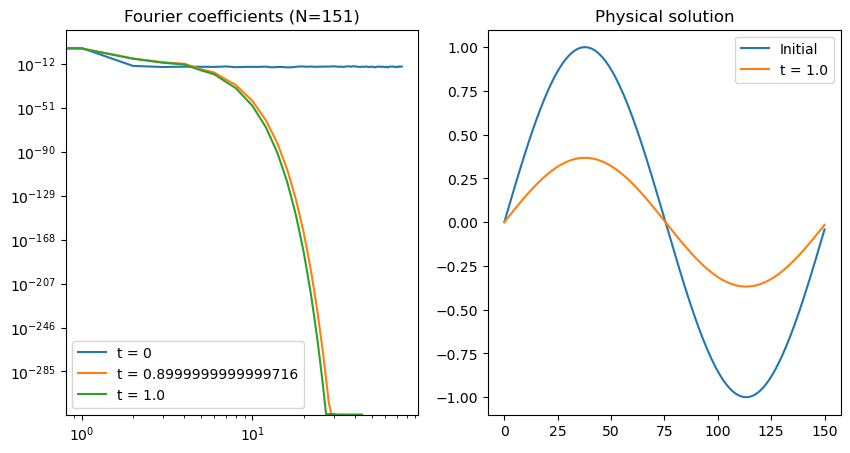

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
N = 151
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt=3e-4, v=1, p=9e3, tf=1)
freqs = fft.fftfreq(N, 1/N)[0:len(fhats_nn[0])]
c = 0
for t, fhat in zip(ts, fhats_nn):
    c = (c+1) % 3000
    if (c == 1 or t == ts[-1]):
        axs[0].loglog(freqs, np.abs(fhat), label=f't = {str(t)}')
axs[0].legend()
axs[0].set_title(f"Fourier coefficients (N={N})")

axs[1].plot(ifft_nn(fhats_nn[0]), label='Initial')
axs[1].plot(ifft_nn(fhats_nn[-1]), label=f't = {ts[-1]}')
axs[1].legend()
axs[1].set_title("Physical solution")
plt.show()

# Solution isn't showing any signs of blow-up.

## (d) $$\int_0^{2\pi} u(x,t)dx = \frac{2\pi}{2\pi}\int_0^{2\pi}\left.e^{-ikx}\right|_{k=0}u(x,t)dx.$$

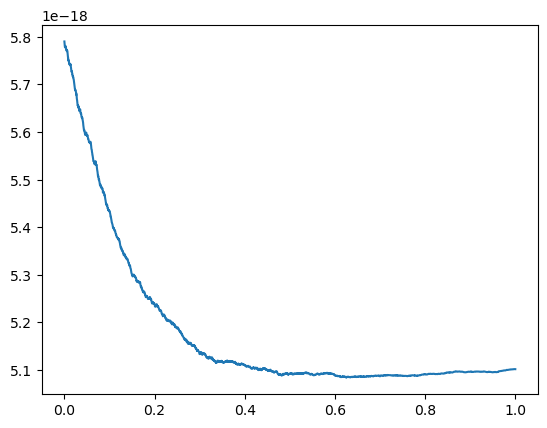

In [15]:
N = 151
v = 1.5
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt=3e-4, v=v, p=1, tf=1)
## Normalised coefficients
fhats_nn = np.array(fhats_nn) / N
plt.plot(ts, np.abs(fhats_nn[:,0]))

## $$\hat u(0) = 0\forall t \implies u\text{ is conserved.}$$

#### Plancheral's theorem assures us that $||u||_2 = ||\hat u||_2$.

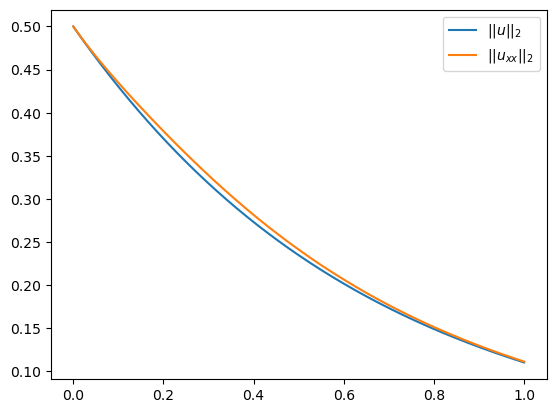

In [16]:
# axis=1 so that we don't take a norm across different times.
u_2 = np.linalg.norm(fhats_nn, ord=2, axis=1)
plt.plot(ts, u_2, label='$||u||_2$')
ddfhats_nn = np.array([DerivP(fhat_nn, 2) for fhat_nn in fhats_nn])
uxx_2 = np.linalg.norm(ddfhats_nn, ord=2, axis=1)
plt.plot(ts, uxx_2, label='$||u_{xx}||_2$')
plt.legend()

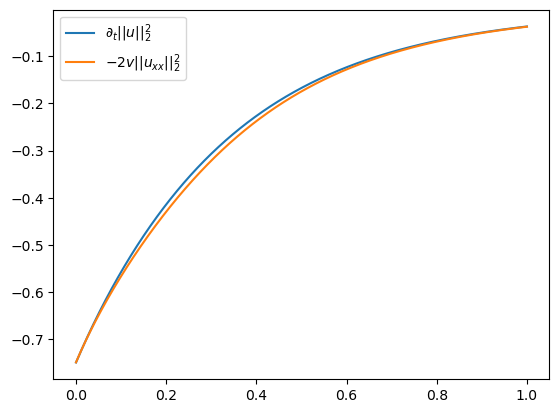

In [17]:
dt = ts[1] - ts[0]
u_2_sq = np.power(u_2, 2)
u_2_sq_t = 1/ dt * (u_2_sq - np.roll(u_2_sq,1))
plt.plot(ts[1:-1], u_2_sq_t[1:-1], label='$\partial_t||u||^2_2$')
plt.plot(ts[1:-1], -2 * v * np.power(uxx_2[1:-1], 2), label='$-2v||u_{xx}||^2_2$')
plt.legend()

## (f)

I think our truncation of the Fourier series causes the blowup.

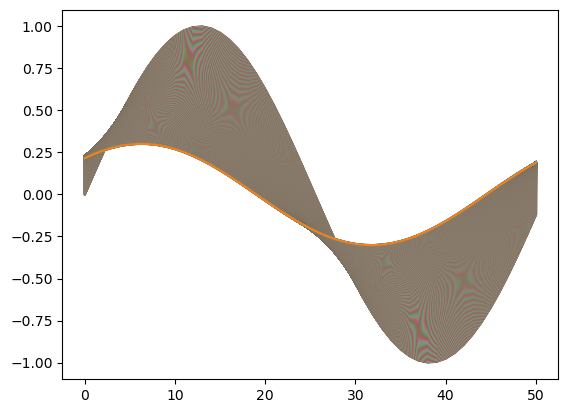

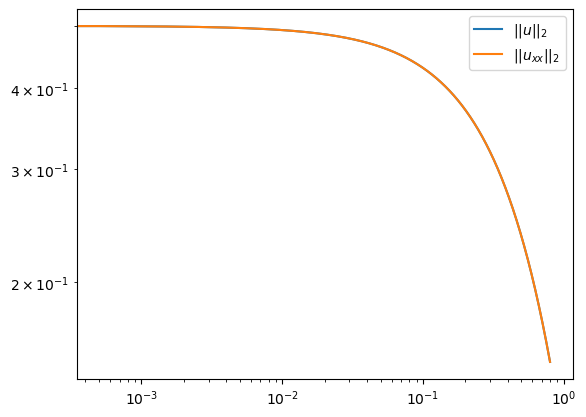

In [18]:
N = 51
init_nn = InitCondition(N)
ts, fhats_nn = rk4(RHS, y0 = init_nn, t0 = 0, dt=5e-4, v=1.5, p=0, tf=0.8)
for t, fhat_nn in zip(ts, fhats_nn):
    plt.plot(ifft_nn(fhat_nn))
plt.show()
## Normalised coefficients
fhats_nn = np.array(fhats_nn) / N

# axis=1 so that we don't take a norm across different times.
u_2 = np.linalg.norm(fhats_nn, ord=2, axis=1)
plt.plot(ts, u_2, label='$||u||_2$')
ddfhats_nn = np.array([DerivP(fhat_nn, 2) for fhat_nn in fhats_nn])
uxx_2 = np.linalg.norm(ddfhats_nn, ord=2, axis=1)
plt.loglog(ts, uxx_2, label='$||u_{xx}||_2$')
plt.legend()
plt.show()

## It seems that there are oscillations being introduced because the numerical scheme cannot handle the shocks.
I think that is why the solution blows up numerically, but does exist analytically.
A few tries shows that I can extend the solution by reducing $dt$.